
# Intro: Loading Files & Library



*   **This Notebook is not meant to teach programming.** In fact no coding skills are needed.
*   Its purpose is to allow exploring a Twitter data set and protocol the endeavour.
*   You can go through the different chapters, read the instructions, run the code and make notes. In the end, you can close all code & output fields (the little ▶ left to the the headlines) to get a clean list of your field notes / findings.
  * How can I run code? --> click on the "[ ]" or ▶ besides the code cells. Then, the notebook widget appears and allows manipulating the queries.

*   As the last step, the notebook asks you to reflect about what might be worth telling. This helps to draft a narrative about your discovery.




*   I wrote some python modules to easily download and prepare datasets for discovering twitter data in this online notebook.
*   Running the next two cells make this stuff run on Google Servers. This allows us to colaborate on the data without installing any developer environments.




In [5]:
# Required Code to run the notebook with a library & database on google drive
from google.colab import drive

folder="CoLab_Twitter_analysis"

directory=f"/content/drive/MyDrive/{folder}/"
drive.mount("/content/drive/" ,force_remount=True)

## PopUp: Allow accessing google drive.

import sys
sys.path.append(directory+"myTwitterLibrary/")


# Image Folder:
targetFolder="IMG_Download/"

import os
if not os.path.exists(f'{directory}{targetFolder}'):
   os.makedirs(f'{directory}{targetFolder}')


#Import modules for the data analysis
import pandas as pd
from IPython.display import Image
from ipywidgets import interactive, interact
import ipywidgets as widgets

import myTwitterLibrary
import analysis
import FileImport
import nlp
import imageScroll


#import the data from a json file

print("Hoorray. now we can start!")


Mounted at /content/drive/
Hoorray. now we can start!


**Load Dataset**




the twitter data is prepared as a json file.

In [13]:
Filepath=directory+"2023-09-23_SustainableAI_all.json"
df=pd.read_json(Filepath)


# 1. Start exploring the prepared data set.


*   WordClouds suit well for getting a first qualitative impression of the dataset.
*   When. you look at the wordcloud, you might already get an idea what the data is about. And, given that first idea, some things might surprise you.
*   Talking about surprises can help to reveal expectations about normalcy. So, what is your first impression?




In [7]:
@interact(column=["hashtags","NoStopwords"],Mostcommon=(5,200))
def make_wordcloud(column="NoStopwords",Mostcommon=20,Save_as=""):
    hashtags=[i.lower() for s in df[column].dropna() for i in s] # hashtags OR # no stopwords
    analysis.make_wordcloud(hashtags,filename=Save_as,Mostcommon=Mostcommon)

interactive(children=(Dropdown(description='column', index=1, options=('hashtags', 'NoStopwords'), value='NoSt…

#   >My first thoughts from seeing the wordcloud:

...



# 2. Discovering popular Tweets


*   Filtering the dataset by different conditions is the most important thing to learn about what it containts.

*   The retrieved Twitter contains metadata, such as likes, retweets, visibility, language, or location. On top, basic NLP allows further filtering.
  *   For example, filtering by visibility or likes can indicate the relevance of a tweet in the dataset.
  *   Filtering by Lemmata & Hashtags might help discover certain topics.
  *   Filtering by sentiment / polarity might help to reveal considered hopes and fears (or just indicate how bad basic NLP works).
*   Just play around with the filters to explore the dataset. And, again, make notes in the textfield about what you find interesting.
  *   ... and maybe, you want to return to this task after examining the timerows, networks, and some statistics.


In [8]:
@interact(n_tweets=(1,50),start="2012-11-01",end="2023-01-20",like_count=(0,100),replay_count=(0,100),retweet_count=(0,100),word_count=(1,df.word_count.max()), polarity=(-1,1,0.2),language=df.language.value_counts()[:5].index)
def filter_df(save=False,n_tweets=5,start="2012-11-01",end="2023-01-20",like_count=30,replay_count=0,retweet_count=0,word_count=5,PolarityFilter=False,polarity=0,language="no filter",Wordfilter="", Userfilter=""):
    analysis.filter_df(df,save,n_tweets,start,end,like_count,replay_count,retweet_count,\
                       word_count,polarity,language,Wordfilter=Wordfilter,Userfilter=Userfilter,\
                       PolarityFilter=PolarityFilter, directory=directory)


interactive(children=(Checkbox(value=False, description='save'), IntSlider(value=5, description='n_tweets', ma…

#   >My notes from examining tweets with the filter function:

...







# 3. Counting Users & Elements. Exploring word contexts

*   Social Media is populated by users but not everyone is visble.
*   So the question arrises: who is most popular and who is most active?
This question might be answerd by different indicators, such as likes, replays, visibility, or retweets.
*   Or are you interested in who are the most positive or negative users within a debate?

*   Besides, Twitter's gamification feature comes into play: While you might have joined Twitter to, e.g. follow debates or debunk misinformation, the Twitter Game is about getting most Likes and Followers. In many cases, this gaming layer motivates different action and language.





In [67]:
@interact(by_value=['like_count',"retweet_count","reply_count","quote_count","impression_count","word_count","letters_count","polarity"],n=(3,100),aggFunk=["mean","sum"])
def most_popular_users(by_value='like_count',n=10,aggFunk="sum"):
    analysis.most_popular_users(df, by_value=by_value,n=n,plot=True,DataName=False,aggFunk=aggFunk)



interactive(children=(Dropdown(description='by_value', options=('like_count', 'retweet_count', 'reply_count', …

#   >My notes from examining user statistics:

* filter transformation: no big companies, organisations: AI for Good, aimee von robot (researcher)


*  "More Statistics!! We need more numbers!"
  *  Okay, lets count hashtags, words, and urls, using the following cell.

interactive(children=(Dropdown(description='column', index=1, options=('hashtags', 'NoStopwords', 'language', …

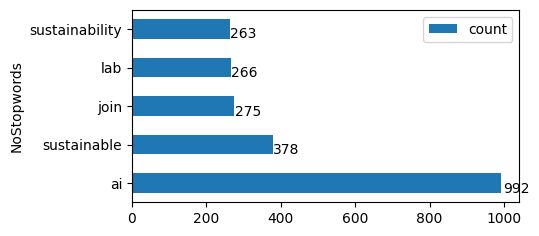

In [28]:
@interact(column=["hashtags","NoStopwords","language","urls"],n=(3,100))
def mostCommon(column="NoStopwords",n=5):
    analysis.mostCommon(df,column,n)

#   >My notes from examining some Statistics about hashtags, urls, and words

...

# Words in Context
*   Ok, maybe you found some words and you wonder "Why is this Popular!?" "What does this now have to do with my topic? "What does this word mean - in context?"
*   In other cases you might like to know if other words also appear in the dataset, e.g. because you are interested in "fraud" "sustainability" or "printing" --> Let's find it out!
* The first cell generates a network of most common words that appear together in one Tweet.
  * The words are represented in a graph. However quality of edges (many vs. little links between words) was not possible with this easy web representation.
* The second cell allows examining what words come before and after a certain search word.


In [48]:
@interact(column=["hashtags","NoStopwords"],Nodes=(3,300),minDegree=(1,10),removeIsolates=True,only_largest_component=True)
def NetworkAnalysis(column="hashtags",Nodes=20,minDegree=5,removeIsolates=True,only_largest_component=True):
    G=analysis.Word_NetworkGen(df,n=Nodes,column=column)
    G=analysis.CleanGraph(G,removeIsolates=removeIsolates,minDegree=minDegree,only_largest_component=only_largest_component)
    analysis.writeNetworkHTML(G,view=True)

interactive(children=(Dropdown(description='column', options=('hashtags', 'NoStopwords'), value='hashtags'), I…

In [87]:
#This cell allows to read the words before and after a search_word. You can change the searchword & the size of the context.
@interact(search_word="generation",words_before=(0,10),words_after=(0,10))
def text_context(column=["text","pure_text","NoStopwords"],search_word="sustainable",words_before=1,words_after=1):
    df[column].dropna().apply(analysis.Keyword_context,search_word=search_word.lower(),context=(words_before,words_after))

interactive(children=(Dropdown(description='column', options=('text', 'pure_text', 'NoStopwords'), value='text…

#   >My notes from examining hashtags, urls, text statistics, and word contexts:








#4. Image Analysis (NEW)

This section contains two cells:
1. download images from a filtered dataset
2. display images with text

In [14]:

Filepath=directory+"filtered_dataset.json"

imgs=pd.read_json(Filepath)
#imgs=df
imgs=imgs[imgs.media_url.apply(lambda x:len(x)>0)][:1000]
imgs.media_url.apply(imageScroll.downloadImages, targetFolder=directory+"IMG_Download/")
n_max=len(imgs)
print(f"download {n_max} images - done.")

https://pbs.twimg.com/media/FvWUquUXsAAoZgV.jpg, https://pbs.twimg.com/media/FvR53FoXsAEELS1.jpg, https://pbs.twimg.com/media/FvR58HMWAAAs8Dw.jpg, https://pbs.twimg.com/media/FvR6JRxXoAEVR-6.jpg, https://pbs.twimg.com/media/FvR7J-NWcAI3OF2.jpg, https://pbs.twimg.com/media/FvRTtOQXsAAxwzc.jpg, https://pbs.twimg.com/media/FvOOY-faUAA0bXs.jpg, https://pbs.twimg.com/media/FvOOZM1aIAE5Uvt.jpg, error:  https://pbs.twimg.com/media/FvOOZM1aIAE5Uvt.jpg
https://pbs.twimg.com/media/FvOOZmCaIAA7QJA.jpg, https://pbs.twimg.com/media/FvOOaE3aYAAO2cW.jpg, https://pbs.twimg.com/media/FvOBxz2XsAE9Qmk.jpg, https://pbs.twimg.com/media/FvN3rosWwAE3DMD.jpg, https://pbs.twimg.com/media/FvN3romWwAEMFjp.jpg, https://pbs.twimg.com/media/FvNkg_ZX0AkEflQ.jpg, https://pbs.twimg.com/media/FvNjeLzXsAIZQEH.jpg, https://pbs.twimg.com/media/FvNjrC6WYAEROs4.jpg, https://pbs.twimg.com/media/FvNJf_BXgAAdG1a.jpg, https://pbs.twimg.com/media/FvM1eCmX0AoSaBD.jpg, https://pbs.twimg.com/media/FvM1fcfX0AEawxM.jpg, https://pbs.t

In [15]:
@interact(n=(0,n_max-1))
def scrollImages(n=0):
    filename=imageScroll.displayImage(imgs,targetFolder=directory+"IMG_Download/",n=n)
    return Image(filename)

interactive(children=(IntSlider(value=0, description='n', max=318), Output()), _dom_classes=('widget-interact'…

#5.1. Timerow analysis


*  There is no constant interest and attention for all topics.
*  Timerow analysis helps to evaluate if there is generally growing or decreasing interest in a topic.
  *  You can use the date Filter to zoom in or out.
  * However, this notebook does not respect the general increas of tweets. Here, normalization does not divide the count against the total amount of tweets but against the maximum of tweets per time in the dataset.
*  And of course, you might find times of peaking attention due to different reasons.
  *  If you are interested in hype - do not just look at the counts of tweets but also at the sentiment, in terms of polarity and subjectivity.
*  Again, make notes of your discovery.
  * What is worth telling?
  * Are there findings that make you want to go back to the filter function?






interactive(children=(Dropdown(description='column', options=('count', 'subjectivity', 'polarity'), value='cou…

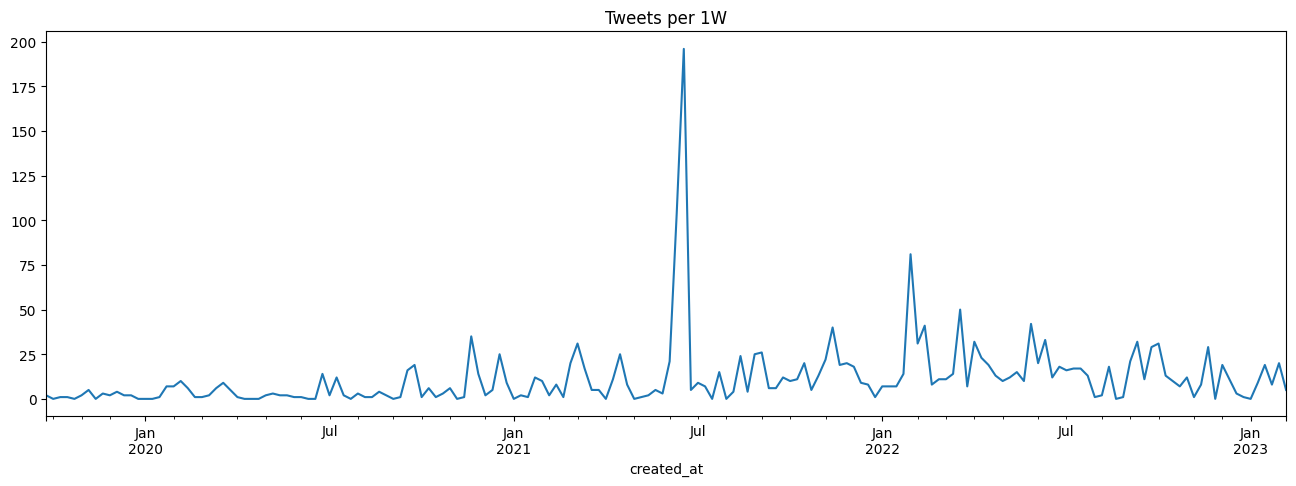

In [74]:
@interact(column=["count","subjectivity","polarity"],normalize=False,resample=["1H","12H","1D","2D","3D","1W","2W","M","Q"])
def TweetHist(column="count",normalize=False,resample="1W",start='2010-01-14',end='2023-02-06'):
    analysis.TweetsHist(df,name=column, resample=resample,start=start,end=end, normalize=normalize)

# > My notes from time row analysis 1


*   Listeneintrag
*   Listeneintrag



#5.2. Timerow analysis 2: The presence of users, hashtags and words

*   For an impression of how the contents and participants of a discourse developed, we can look at the trends of words, hashtags, and user activity  over time.


interactive(children=(IntSlider(value=10, description='n', max=20, min=2), Dropdown(description='name', option…

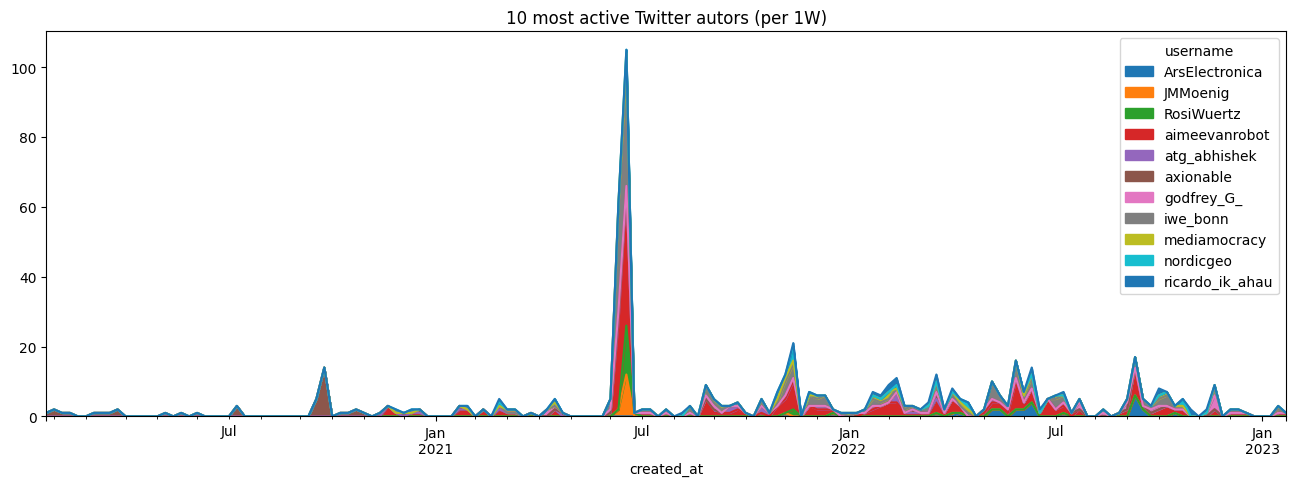

In [75]:
@interact(n=(2,20),name=["username","name","hashtags","NoStopwords"],resample=["1H","12H","1D","2D","3D","1W","2W","M","Q"])
def userTimeseries(n=10,name="username",resample="1W",start="2010-01-01",end="2023-01-20",stacked=True):
    analysis.userTimeseries(df,name=name,n=n,resample=resample,start=start,end=end,stacked=stacked)

# > My notes from time row analysis 2

#6. Social Networks: Graph Analysis

> Eingerückter Textblock




*   Social Media "lives" from interactions, such as likes, retweets, and responses
  *   A social graph represents nodes (users) that are connected by edges (interactions).

  *  You can filter the graph by the "minimum Degree", i.e. the number of edges between one users. A high degree comes from multiple responses to or by the user.
  *   You might find that there is a central network and little communications around. The second filter allows to focus only on the largest connected subgraph.
  *  Some topics, such as nuclear power, show a dense communication between different subgroups that, themselves, are only weakly connected. Do you find any of these phenomena? Are there any interesting (e.g. repreating) patterns?



*   Some remarks:
  *   This dataset contains only responses to users. Another option, representing all retweets, is not included to keep the dataset small.
  *  This online HTML/JavaScrip representation get very slow for large networks. Therefore, I limited it to 60 nodes.
  *  DiGraphs also represent the direction of communication. However, the networkx module does not support isolation of a graph for DiGraphs, yet.
  *  Network analysis becomes more interesting when, e.g. colors represent qualities such as confirmatory / critical citation. However, for this workshop that level of analysis might be enough...



In [76]:
@interact(minDegree=(1,50),removeIsolates=True,only_largest_component=True)
def NetworkAnalysis(minDegree=30,removeIsolates=True,only_largest_component=True):
  G=analysis.NetworkGen(df)
  G=analysis.CleanGraph(G,removeIsolates=removeIsolates,minDegree=minDegree,only_largest_component=only_largest_component)
  analysis.writeNetworkHTML(G,view=True)

interactive(children=(IntSlider(value=30, description='minDegree', max=50, min=1), Checkbox(value=True, descri…

# > My notes from examining the communication network:



# 7. Final step: What is worth telling?
- Congratulations, you made an individual journey through the dataset!
- I hope it was not too boring. Where there any surprises? What do you think is worth mentioning?
- Well, many crime stories are told in a way that the audience knows from the start both, the crime and why it matters. And still, the viewer enjoys the suspense and surprise of following the detective revealing and juxtaposing data to reconstruct what one already knows.
- Let's use this structure and not write a conclution at the end but at the beginning. Indicate what findings make the data set worth exploring so that the next reader enjoys your detective work's journey. Therefore, just edit the cell with the --- after the introduction. Change the --- into a headline and write a new introduction guides the readers attention for your field notes and makes selected findings worth telling.